In [6]:
from tqdm import tqdm

from models.ARIMAModel import ARIMAModel

from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fitting_start_date = datetime(year=1999,month=1,day=1,hour=3)
forecasts_start_date = datetime(year=2000,month=1,day=1)
time_of_forecasting = pd.Timedelta(weeks=1)

temp = pd.read_csv('./data/cex4WindDataInterpolated.csv')
temp['t'] = pd.to_datetime(temp['t'])

mask = (temp['t'] > '2000') & (temp['t'] < forecasts_start_date + time_of_forecasting)
dates = temp.loc[mask,'t']

list_1hourAhead_forecastValues = []
list_1hourAhead_forecastUpper = []
list_1hourAhead_forecastLower = []

list_2hourAhead_forecastValues = []
list_2hourAhead_forecastUpper = []
list_2hourAhead_forecastLower = []

list_3hourAhead_forecastValues = []
list_3hourAhead_forecastUpper = []
list_3hourAhead_forecastLower = []

for date in tqdm(dates):

    #############################################################################
    ## INITIALISATION OF THE ARIMA(1,1,1)
    #############################################################################
    myModel = ARIMAModel()
    myModel.get_data(
        first_date=fitting_start_date,
        last_date=date
    )

    myModel.fit(print_summary=False)

    # Forecast 1-hour ahead
    forecast_values, confidence_interval = myModel.forecast(steps=1, alpha=0.05)
    
    list_1hourAhead_forecastValues.append(forecast_values.iloc[-1])
    list_1hourAhead_forecastLower.append(confidence_interval['lower p'].iloc[-1])
    list_1hourAhead_forecastUpper.append(confidence_interval['upper p'].iloc[-1])

    # Forecast 2-hour ahead
    forecast_values, confidence_interval = myModel.forecast(steps=2, alpha=0.05)

    list_2hourAhead_forecastValues.append(forecast_values.iloc[-1])
    list_2hourAhead_forecastLower.append(confidence_interval['lower p'].iloc[-1])
    list_2hourAhead_forecastUpper.append(confidence_interval['upper p'].iloc[-1])

    # Forecast 3-hour ahead
    forecast_values, confidence_interval = myModel.forecast(steps=3, alpha=0.05)

    list_3hourAhead_forecastValues.append(forecast_values.iloc[-1])
    list_3hourAhead_forecastLower.append(confidence_interval['lower p'].iloc[-1])
    list_3hourAhead_forecastUpper.append(confidence_interval['upper p'].iloc[-1])
    
forecastValues_1hourAhead = np.array(list_1hourAhead_forecastValues).flatten()
forecastUpper_1hourAhead = np.array(list_1hourAhead_forecastUpper).flatten()
forecastLower_1hourAhead = np.array(list_1hourAhead_forecastLower).flatten()

forecastValues_2hourAhead = np.array(list_2hourAhead_forecastValues).flatten()
forecastUpper_2hourAhead = np.array(list_2hourAhead_forecastUpper).flatten()
forecastLower_2hourAhead = np.array(list_2hourAhead_forecastLower).flatten()

forecastValues_3hourAhead = np.array(list_3hourAhead_forecastValues).flatten()
forecastUpper_3hourAhead = np.array(list_3hourAhead_forecastUpper).flatten()
forecastLower_3hourAhead = np.array(list_3hourAhead_forecastLower).flatten()

100%|████████████████████████████████████████████████████████████████████████████████| 167/167 [02:22<00:00,  1.17it/s]


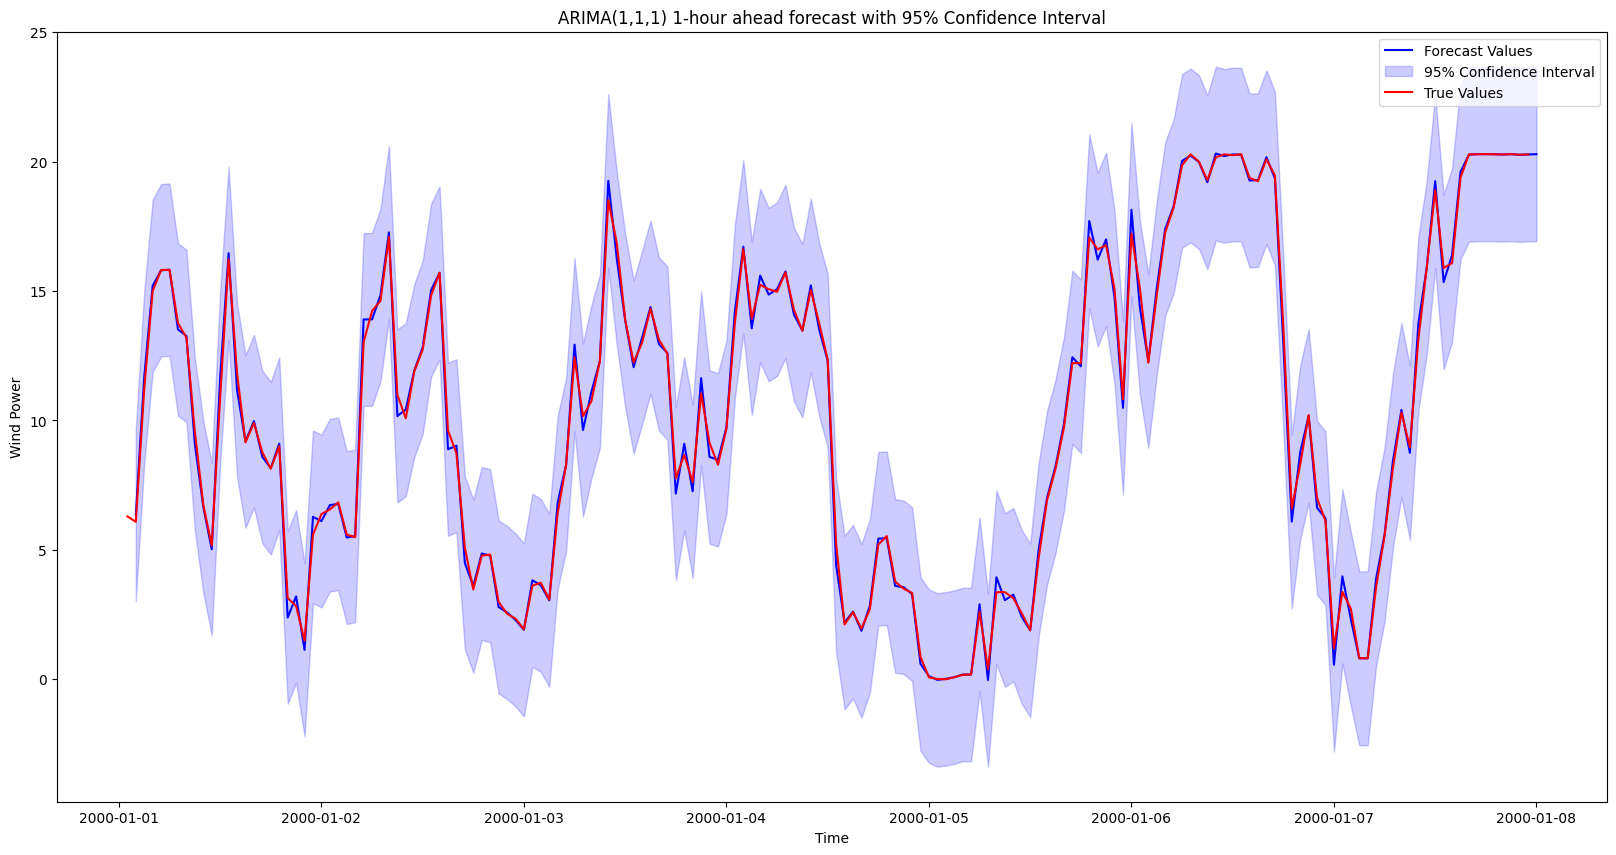

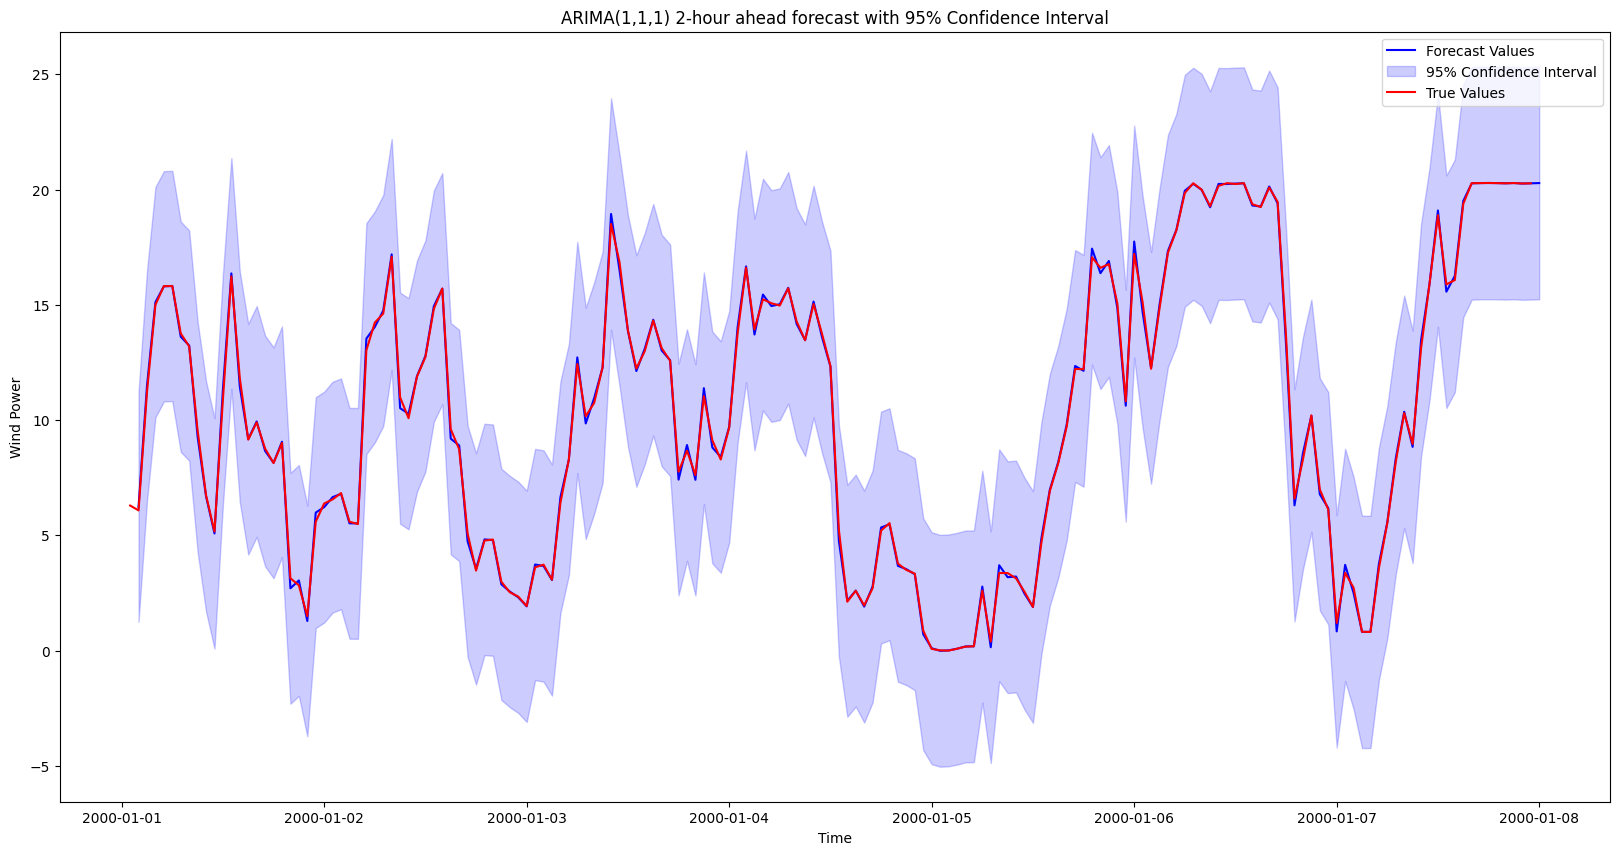

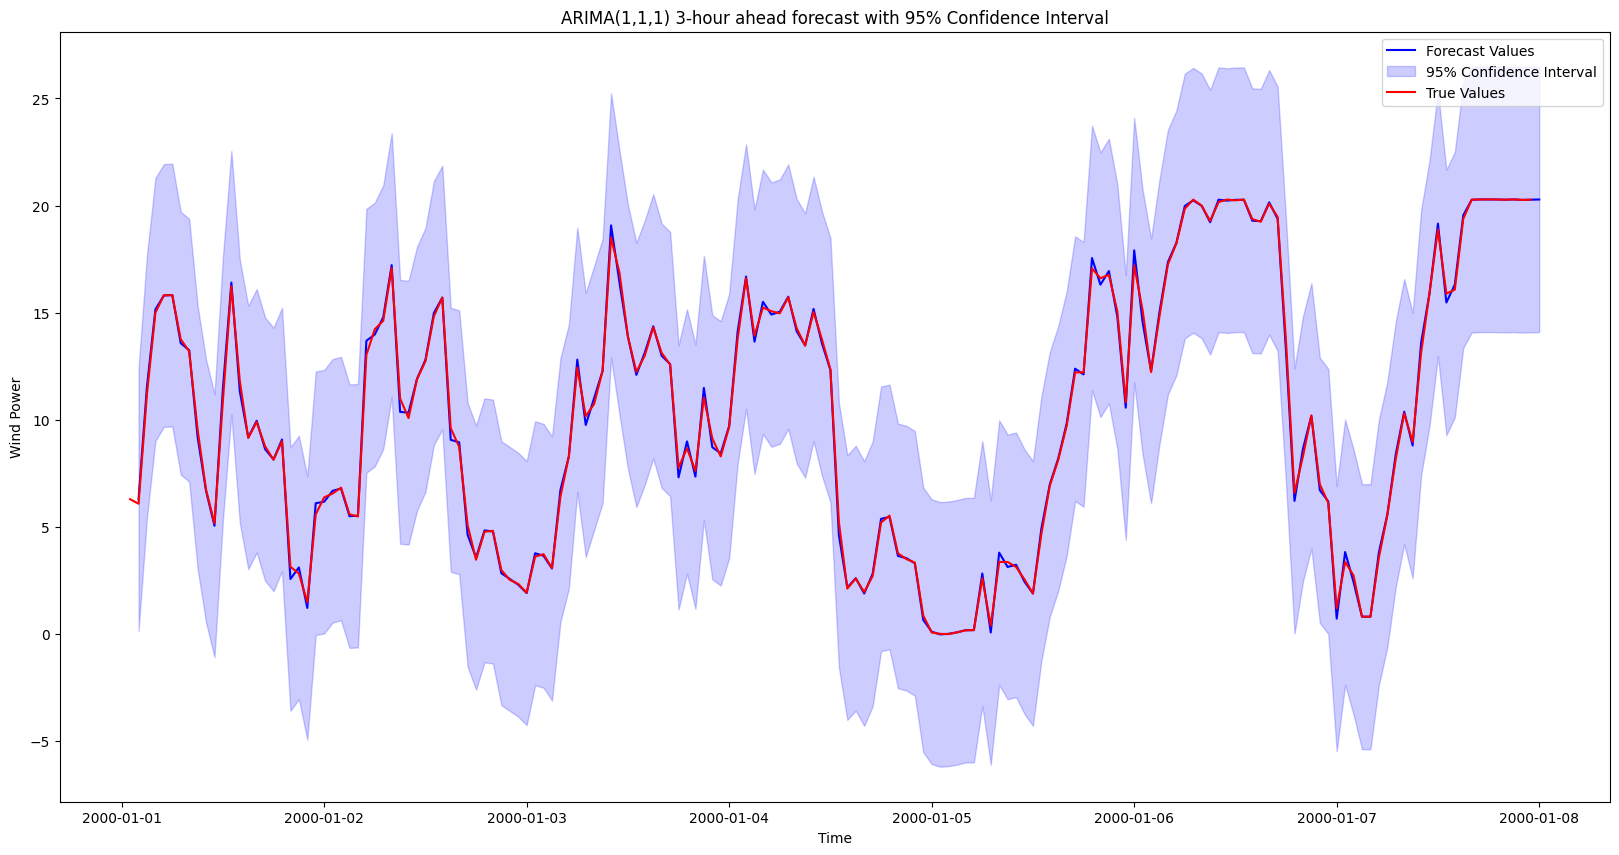

In [7]:
###########################################################################
## SOME PLOTS
###########################################################################

# 1-hour ahead Forecast 
plt.figure(figsize=(20,10))
plt.plot(dates+pd.Timedelta(hours=1), forecastValues_1hourAhead, label='Forecast Values', color='blue')
plt.fill_between(dates+pd.Timedelta(hours=1), forecastLower_1hourAhead, forecastUpper_1hourAhead, color='blue', alpha=0.2, label='95% Confidence Interval')
plt.plot(dates, temp.loc[mask,'p'], label='True Values', color='red')
plt.title('ARIMA(1,1,1) 1-hour ahead forecast with 95% Confidence Interval')
plt.xlabel('Time')
plt.ylabel('Wind Power')
plt.legend()
plt.show()

# 2-hour ahead Forecast 
plt.figure(figsize=(20,10))
plt.plot(dates+pd.Timedelta(hours=1), forecastValues_2hourAhead, label='Forecast Values', color='blue')
plt.fill_between(dates+pd.Timedelta(hours=1), forecastLower_2hourAhead, forecastUpper_2hourAhead, color='blue', alpha=0.2, label='95% Confidence Interval')
plt.plot(dates, temp.loc[mask,'p'], label='True Values', color='red')
plt.title('ARIMA(1,1,1) 2-hour ahead forecast with 95% Confidence Interval')
plt.xlabel('Time')
plt.ylabel('Wind Power')
plt.legend()
plt.show()

# 3-hour ahead Forecast 
plt.figure(figsize=(20,10))
plt.plot(dates+pd.Timedelta(hours=1), forecastValues_3hourAhead, label='Forecast Values', color='blue')
plt.fill_between(dates+pd.Timedelta(hours=1), forecastLower_3hourAhead, forecastUpper_3hourAhead, color='blue', alpha=0.2, label='95% Confidence Interval')
plt.plot(dates, temp.loc[mask,'p'], label='True Values', color='red')
plt.title('ARIMA(1,1,1) 3-hour ahead forecast with 95% Confidence Interval')
plt.xlabel('Time')
plt.ylabel('Wind Power')
plt.legend()
plt.show()

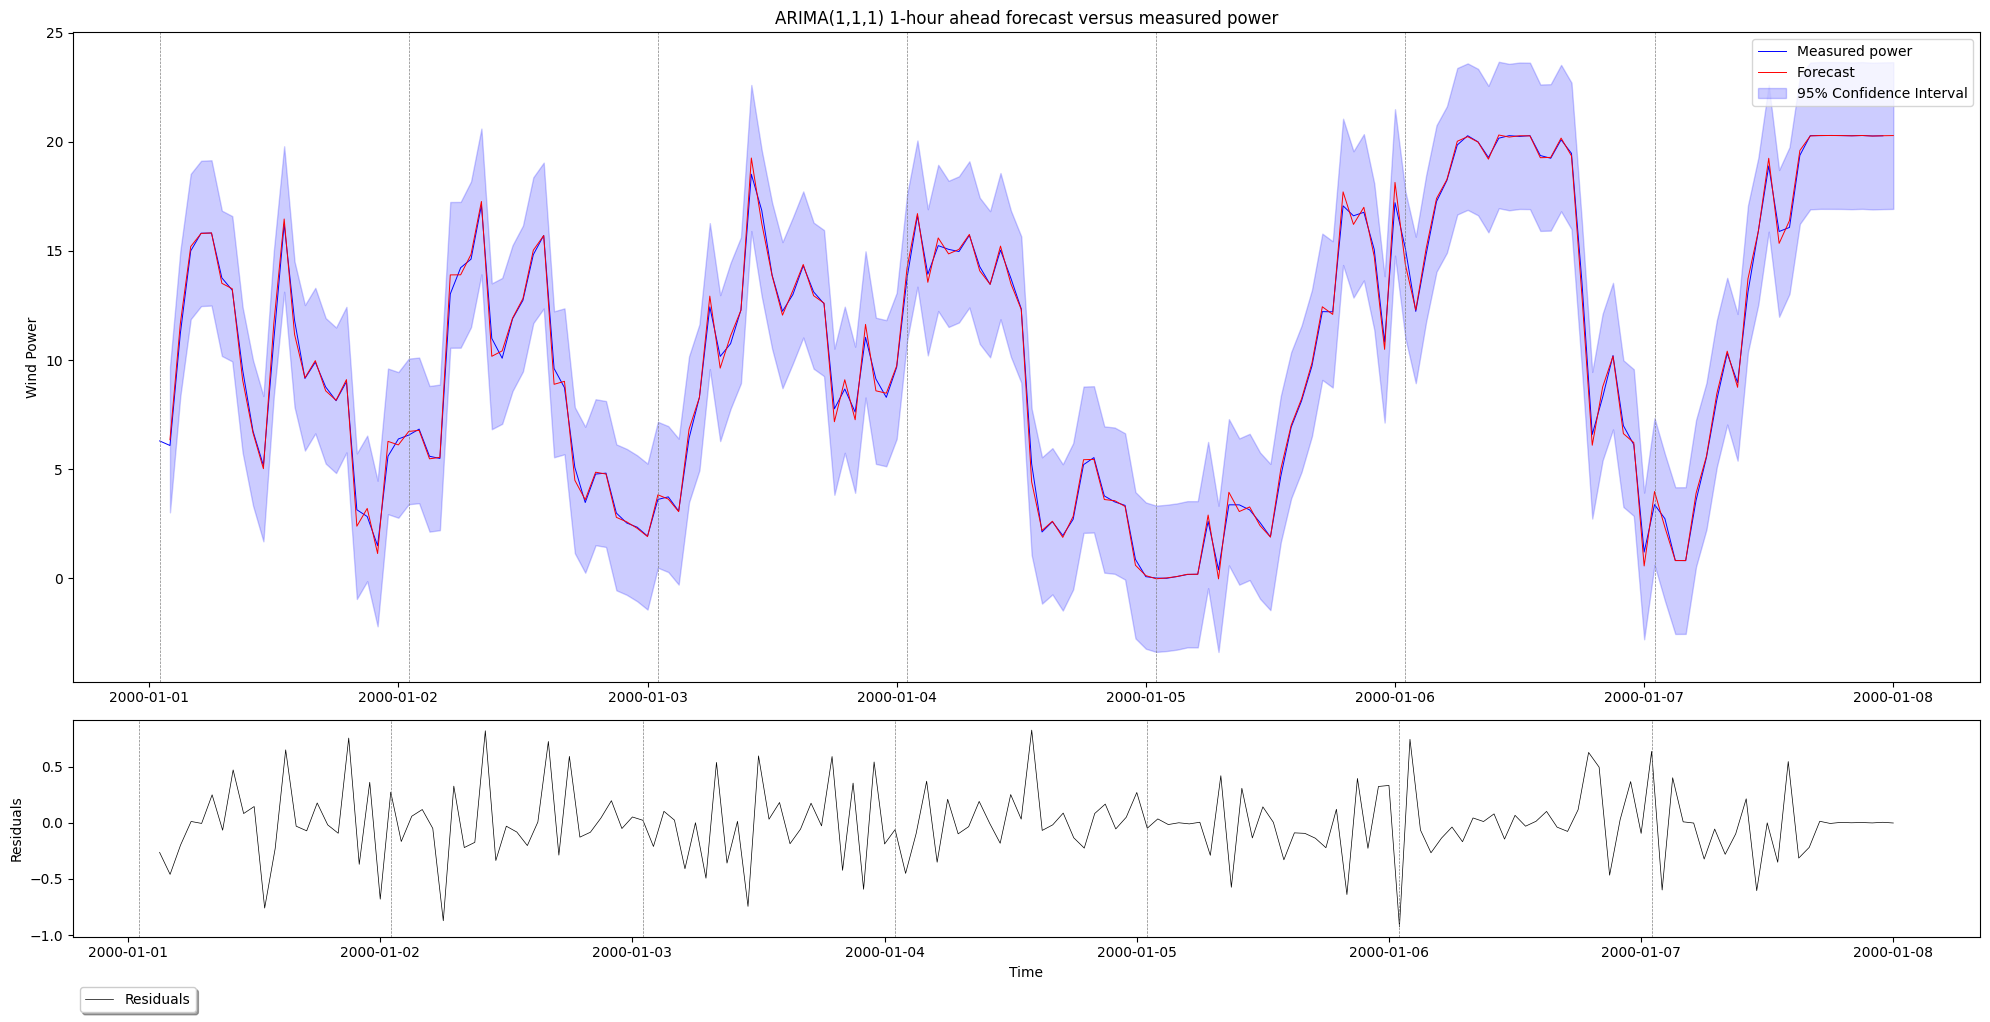

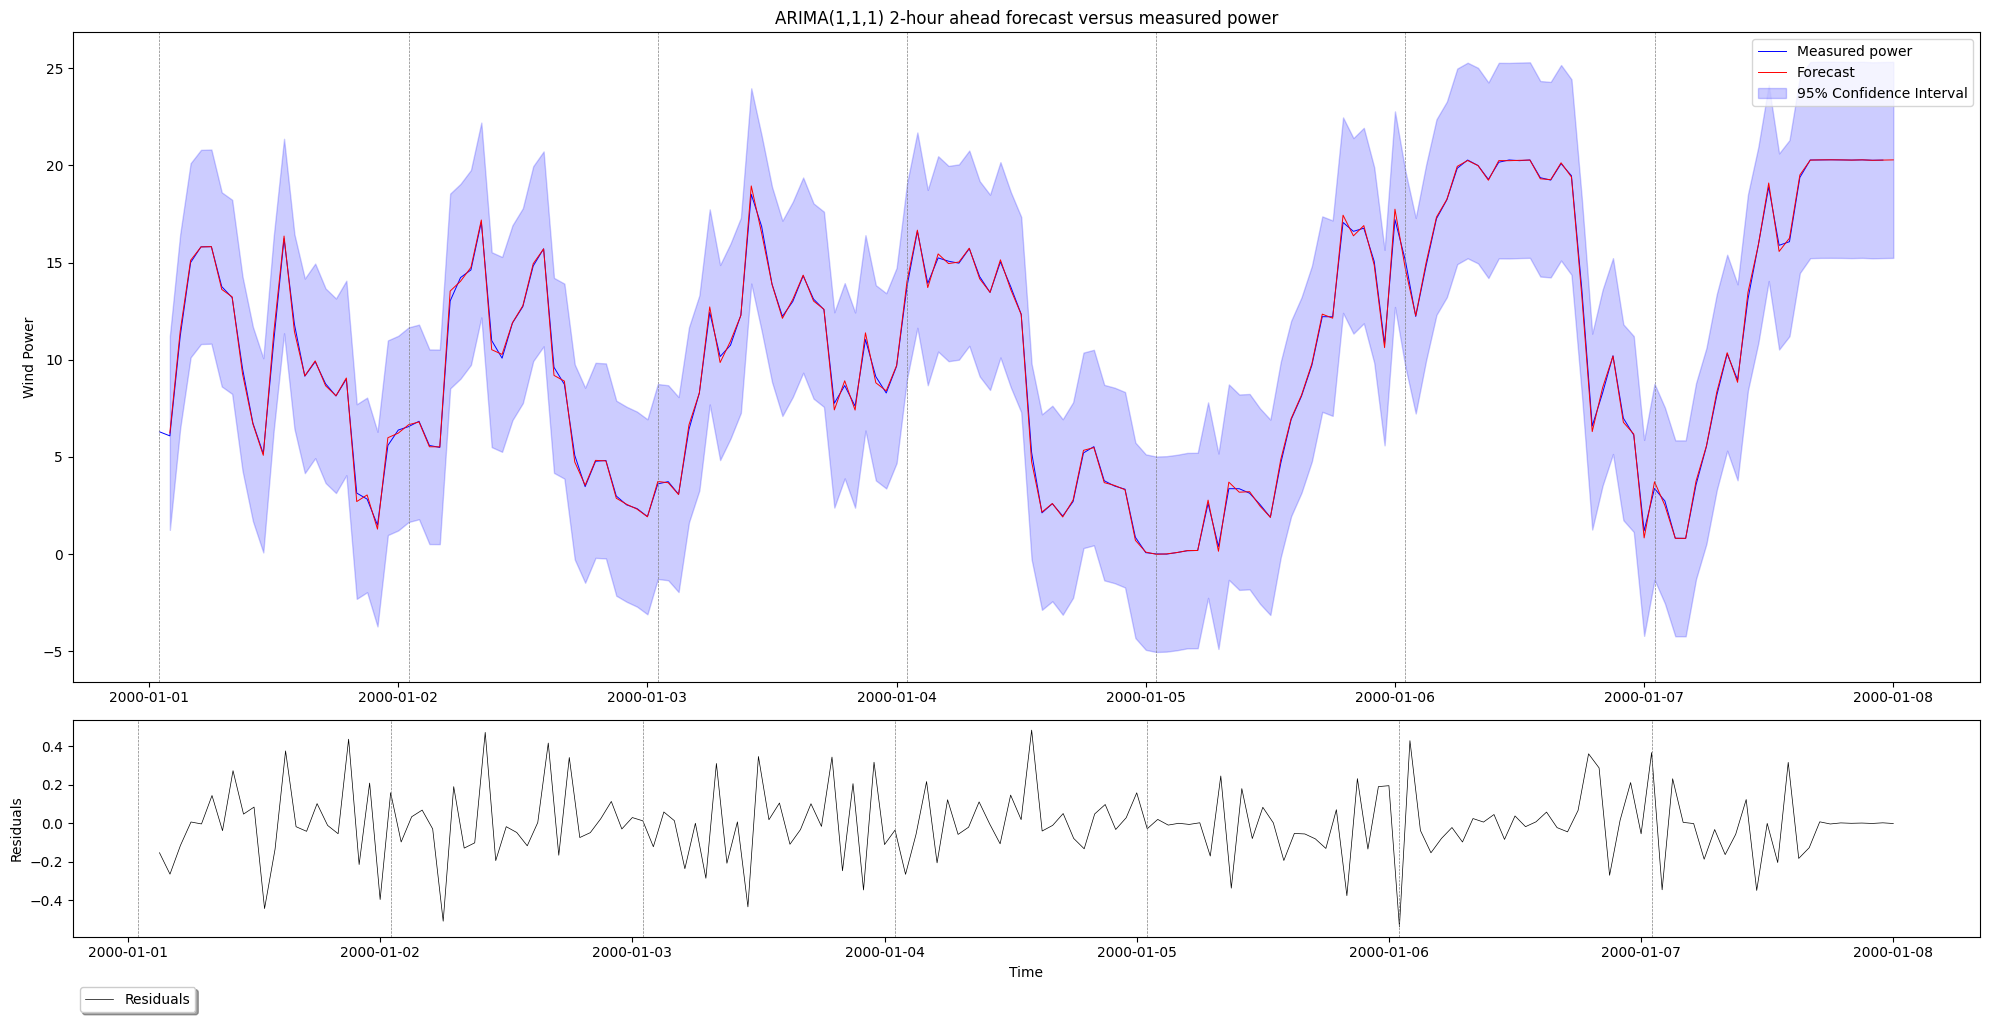

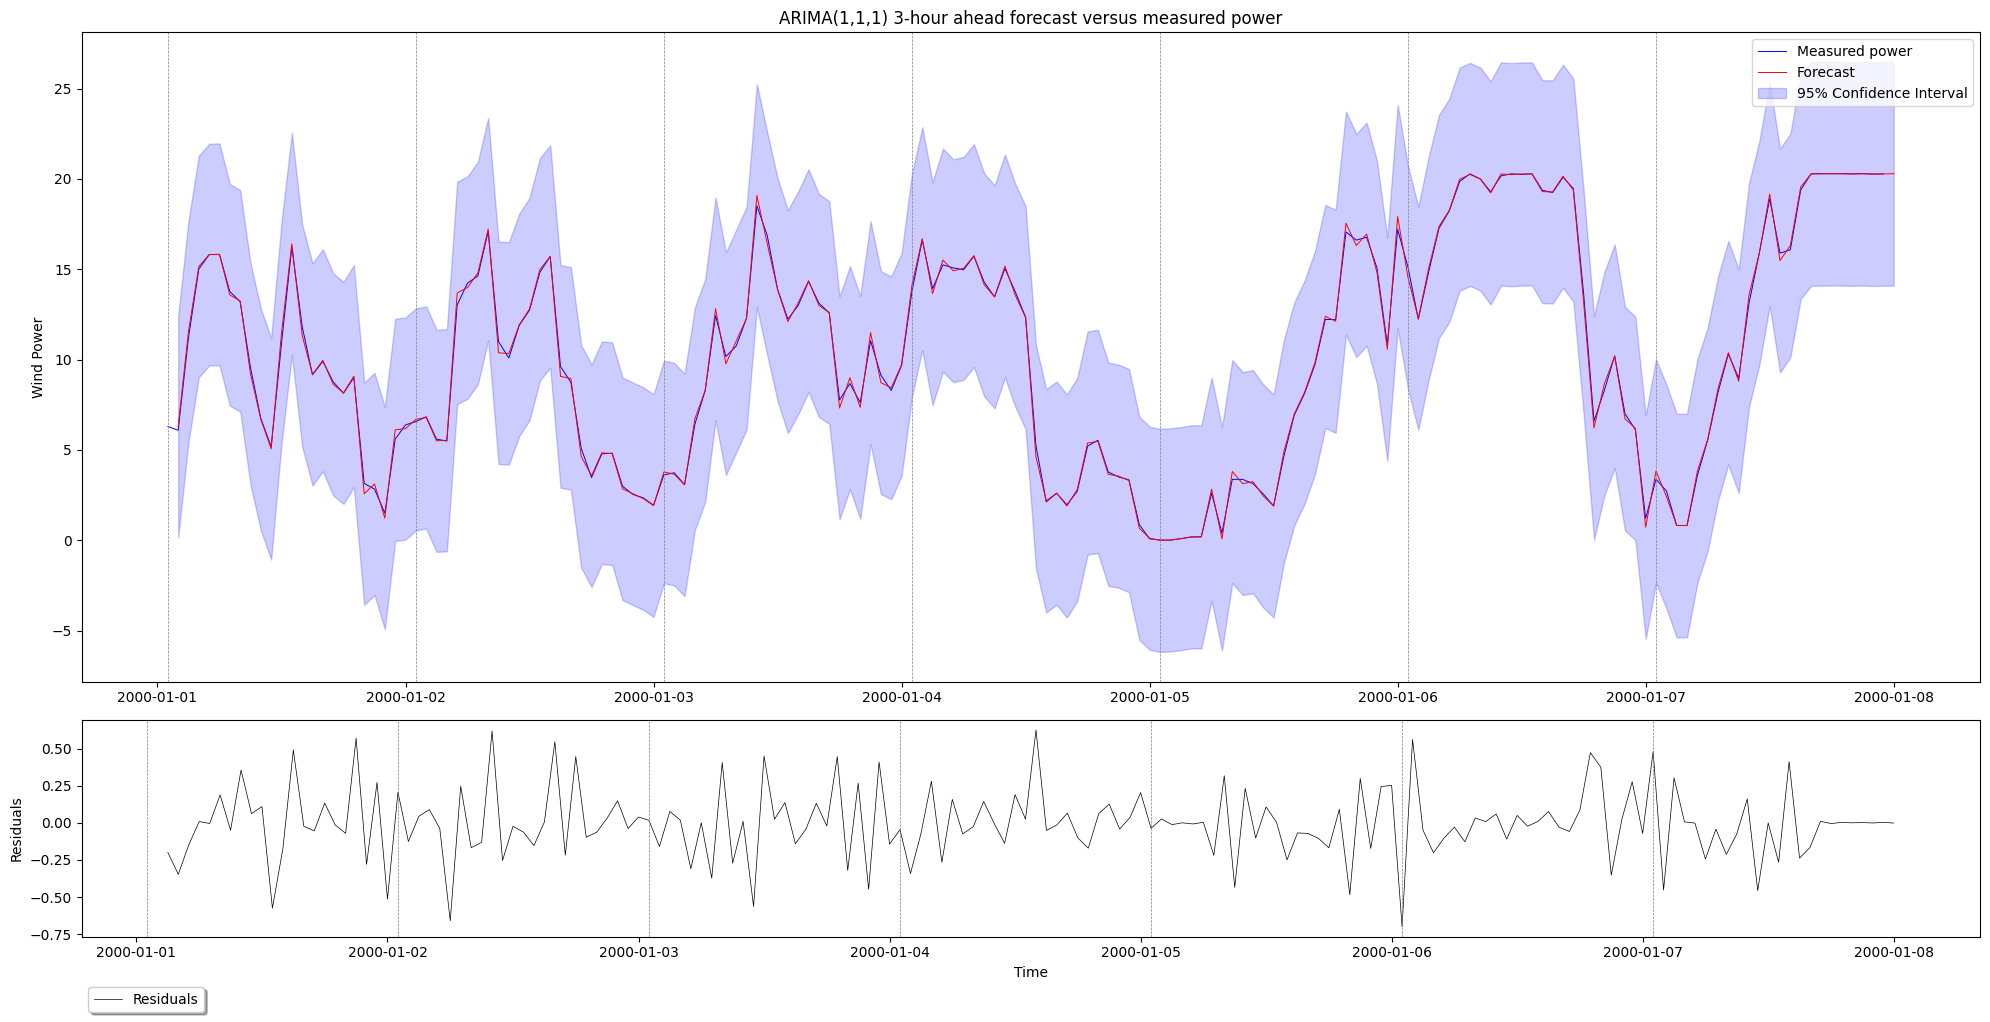

In [8]:
# 1-hour ahead Forecast and residuals 
fig, axs = plt.subplots(2, 1, figsize=(20, 10), gridspec_kw={'height_ratios': [3, 1]})

axs[0].plot(dates, temp.loc[mask,'p'], linewidth=0.7, label='Measured power', color='blue')
axs[0].plot(dates+pd.Timedelta(hours=1), forecastValues_1hourAhead, linewidth=0.7, label='Forecast', color='red')
axs[0].fill_between(dates+pd.Timedelta(hours=1), forecastLower_1hourAhead, forecastUpper_1hourAhead, color='blue', alpha=0.2, label='95% Confidence Interval')
axs[0].set_title('ARIMA(1,1,1) 1-hour ahead forecast versus measured power')
axs[0].set_ylabel('Wind Power')
axs[0].legend()
for day in pd.date_range(start=dates.min(), end=dates.max(), freq='D'):
    axs[0].axvline(day, linestyle='--', color='gray', linewidth=0.5)

residual_dates = dates + pd.Timedelta(hours=1)
axs[1].plot(residual_dates[1:], temp.loc[mask,'p'].values[1:] - forecastValues_1hourAhead[:-1], linewidth=0.5, label='Residuals', color='black')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Residuals')
for day in pd.date_range(start=dates.min(), end=dates.max(), freq='D'):
    axs[1].axvline(day, linestyle='--', color='gray', linewidth=0.5)

plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(0, -0.2), fancybox=True, shadow=True, ncol=2)
plt.show()

# 2-hour ahead Forecast and residuals
fig, axs = plt.subplots(2, 1, figsize=(20, 10), gridspec_kw={'height_ratios': [3, 1]})

axs[0].plot(dates, temp.loc[mask,'p'], linewidth=0.7, label='Measured power', color='blue')
axs[0].plot(dates+pd.Timedelta(hours=1), forecastValues_2hourAhead, linewidth=0.7, label='Forecast', color='red')
axs[0].fill_between(dates+pd.Timedelta(hours=1), forecastLower_2hourAhead, forecastUpper_2hourAhead, color='blue', alpha=0.2, label='95% Confidence Interval')
axs[0].set_title('ARIMA(1,1,1) 2-hour ahead forecast versus measured power')
axs[0].set_ylabel('Wind Power')
axs[0].legend()
for day in pd.date_range(start=dates.min(), end=dates.max(), freq='D'):
    axs[0].axvline(day, linestyle='--', color='gray', linewidth=0.5)

residual_dates = dates + pd.Timedelta(hours=1)
axs[1].plot(residual_dates[1:], temp.loc[mask,'p'].values[1:] - forecastValues_2hourAhead[:-1], linewidth=0.5, label='Residuals', color='black')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Residuals')
for day in pd.date_range(start=dates.min(), end=dates.max(), freq='D'):
    axs[1].axvline(day, linestyle='--', color='gray', linewidth=0.5)

plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(0, -0.2), fancybox=True, shadow=True, ncol=2)
plt.show()


# 3-hour ahead Forecast and residuals
fig, axs = plt.subplots(2, 1, figsize=(20, 10), gridspec_kw={'height_ratios': [3, 1]})

axs[0].plot(dates, temp.loc[mask,'p'], linewidth=0.7, label='Measured power', color='blue')
axs[0].plot(dates+pd.Timedelta(hours=1), forecastValues_3hourAhead, linewidth=0.7, label='Forecast', color='red')
axs[0].fill_between(dates+pd.Timedelta(hours=1), forecastLower_3hourAhead, forecastUpper_3hourAhead, color='blue', alpha=0.2, label='95% Confidence Interval')
axs[0].set_title('ARIMA(1,1,1) 3-hour ahead forecast versus measured power')
axs[0].set_ylabel('Wind Power')
axs[0].legend()
for day in pd.date_range(start=dates.min(), end=dates.max(), freq='D'):
    axs[0].axvline(day, linestyle='--', color='gray', linewidth=0.5)

residual_dates = dates + pd.Timedelta(hours=1)
axs[1].plot(residual_dates[1:], temp.loc[mask,'p'].values[1:] - forecastValues_3hourAhead[:-1], linewidth=0.5, label='Residuals', color='black')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Residuals')
for day in pd.date_range(start=dates.min(), end=dates.max(), freq='D'):
    axs[1].axvline(day, linestyle='--', color='gray', linewidth=0.5)

plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(0, -0.2), fancybox=True, shadow=True, ncol=2)
plt.show()

In [9]:
from models.functions import *

metrics_1hourAhead = compute_metrics(temp.loc[mask,'p'].values[1:],forecastValues_1hourAhead[:-1],'ARIMA(1,1,1) 1-hour ahead')
metrics_2hourAhead = compute_metrics(temp.loc[mask,'p'].values[1:],forecastValues_2hourAhead[:-1],'ARIMA(1,1,1) 2-hour ahead')
metrics_3hourAhead = compute_metrics(temp.loc[mask,'p'].values[1:],forecastValues_3hourAhead[:-1],'ARIMA(1,1,1) 3-hour ahead')

ARIMA(1,1,1) 1-hour ahead: 
         Biais of residuals: -0.008 
         Variance of residuas: 0.104 
         Mean absolute error (MAE): 0.229 
         Mean squared error (MSE): 0.104
ARIMA(1,1,1) 2-hour ahead: 
         Biais of residuals: -0.004 
         Variance of residuas: 0.035 
         Mean absolute error (MAE): 0.133 
         Mean squared error (MSE): 0.035
ARIMA(1,1,1) 3-hour ahead: 
         Biais of residuals: -0.006 
         Variance of residuas: 0.059 
         Mean absolute error (MAE): 0.173 
         Mean squared error (MSE): 0.059
